<hr style="border:2px solid black">

## Project Week 2


[**Course material 2.1**](https://spiced.space/naive-bayleaves/ds-course/chapters/project_titanic/ml_fundamentals/README.html)

Download the data and do the exploratory data analysis as described in Project Milestone 1.

**Note:** train.csv in 2.1 is actually your full data set for the week. You need to split it to **train and validation**.

In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# Import train-test-split
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine learning stack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

### Get the data

In [2]:
full_data = pd.read_csv("data/titanic/train.csv")#working with this one only that is why full

test_for_kaggle = pd.read_csv("data/titanic/test.csv") #cannot touch only use when submitting to Kaggle

In [3]:
full_data.shape

(891, 12)

In [4]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory data analysis

Merge your X_train and y_train from the previous step into train_data

**Step 1 Train-Validation split**

In [5]:
X = full_data.drop('Survived' ,axis= 1)
y = full_data['Survived']

In [6]:
X.shape, y.shape

((891, 11), (891,))

In [7]:
Xtrain, Xval, ytrain, yval = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=101,
    stratify=y
)

## EDA

**STEP 1** Merge the data

In [8]:
df_train= Xtrain
df_train['Survived'] =ytrain # add new column with survived resutls as ytrain
df_train['Survived'] = ytrain

**STEP 2** Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [9]:
df_train.value_counts('Survived') # count all survivors

Survived
0    439
1    273
dtype: int64

<Axes: xlabel='Survived'>

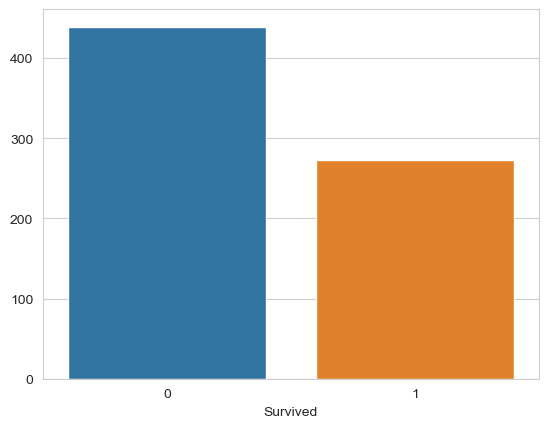

In [10]:
sns.barplot(data = df_train, x = 'Survived', y =df_train.value_counts('Survived'))

**STEP 3**
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [11]:
df_train[df_train['Pclass'] == 1].value_counts('Survived',normalize=True)

Survived
1    0.62069
0    0.37931
dtype: float64

**STEP 4** Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.


<Axes: xlabel='Pclass'>

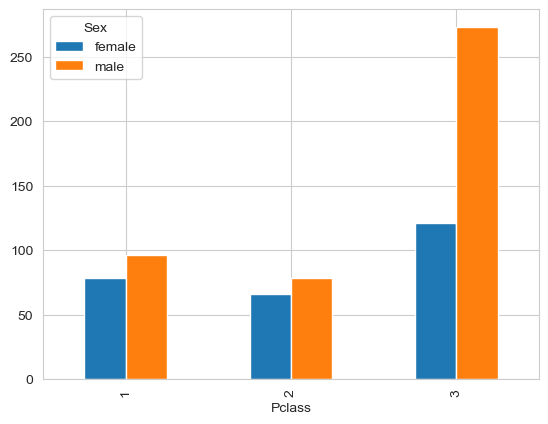

In [12]:
gender_vs_class = df_train.groupby(['Sex', 'Pclass']).size().reset_index(name='counts')
gender_vs_class.pivot(index='Pclass', columns='Sex', values='counts').plot.bar()

**STEP 5** Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<Axes: xlabel='Age', ylabel='Count'>

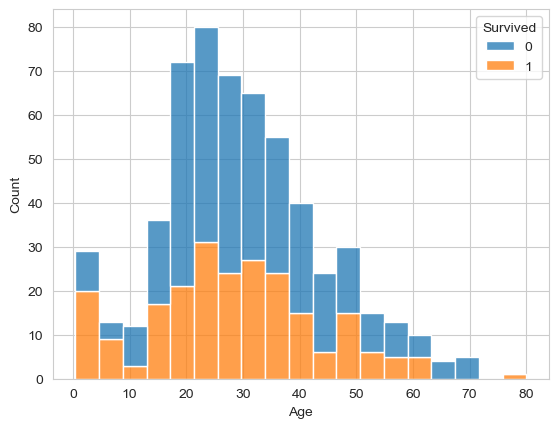

In [13]:
sns.histplot(data=df_train,
             x='Age',
             multiple='stack',
             hue = 'Survived'
            )


**STEP 6** Calculate the average age for survived and drowned passengers separately.


In [14]:
df_train.groupby('Survived')['Age'].mean()

Survived
0    30.536337
1    28.289301
Name: Age, dtype: float64

**Step 7** Replace missing age values by the mean age.

In [15]:
mean_age = df_train['Age'].mean()
#new column as I want to fill it out differently later
df_train['Age_mean'] = df_train['Age'].fillna(value = mean_age) 

#check:
df_train['Age'].isna().sum()

139

**STEP 8**
Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.


In [16]:
pd.DataFrame(df_train.groupby(['Pclass']).value_counts(['Survived']))

0
Pclass Survived     
1      1         108
       0          66
2      0          74
       1          70
3      0         299
       1          95

In [17]:
#see the correlation bw features and output to see which ones to choose for the model

corr_matrix = df_train.corr().abs()
corr_matrix


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Age_mean
PassengerId,1.000000,0.038262,0.015196,0.034455,0.005250,0.010409,0.012068,0.013631
Pclass,0.038262,1.000000,0.386442,0.087292,0.027759,0.558522,0.335572,0.347051
Age,0.015196,0.386442,1.000000,0.293616,0.161333,0.112784,0.076713,1.000000
SibSp,0.034455,0.087292,0.293616,1.000000,0.409662,0.171031,0.031663,0.219237
Parch,0.005250,0.027759,0.161333,0.409662,1.000000,0.204016,0.080495,0.153329
Fare,0.010409,0.558522,0.112784,0.171031,0.204016,1.000000,0.258441,0.108387
Survived,0.012068,0.335572,0.076713,0.031663,0.080495,0.258441,1.000000,0.069329
Age_mean,0.013631,0.347051,1.000000,0.219237,0.153329,0.108387,0.069329,1.000000


<Axes: >

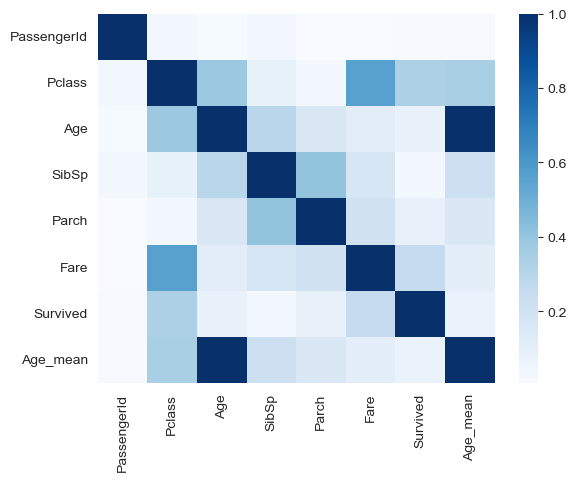

In [18]:
sns.heatmap(data=corr_matrix, robust=True, cmap ="Blues")

In [19]:
spearman_matrix = df_train.corr(method='spearman').abs()
spearman_matrix

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Age_mean
PassengerId,1.000000,0.034446,0.021952,0.029729,0.010567,0.008457,0.012178,0.022838
Pclass,0.034446,1.000000,0.368257,0.024257,0.019937,0.678897,0.338513,0.311494
Age,0.021952,0.368257,1.000000,0.144407,0.239422,0.146656,0.058456,1.000000
SibSp,0.029729,0.024257,0.144407,1.000000,0.457840,0.446262,0.087142,0.112095
Parch,0.010567,0.019937,0.239422,0.457840,1.000000,0.406789,0.150667,0.204603
Fare,0.008457,0.678897,0.146656,0.446262,0.406789,1.000000,0.321965,0.126931
Survived,0.012178,0.338513,0.058456,0.087142,0.150667,0.321965,1.000000,0.043660
Age_mean,0.022838,0.311494,1.000000,0.112095,0.204603,0.126931,0.043660,1.000000


## Feature Engineering

In [20]:
#Sex mapping
Xtrain['Sex'] = Xtrain['Sex'].map({'female':0, 'male':1}) #train set

In [21]:
Xval['Sex'] = Xval['Sex'].map({'female':0, 'male':1})#val set

In [22]:
#Title grouping and renaming
def title_grouping(x):
    if x in ['mrs','mr','miss','master','dr','rev']:
        pass
    elif x in ['mlle','ms']:
        x = 'miss'
    elif x == 'mme':
        x = 'mrs'
    elif x in ['col','major','capt']:
        x = 'army'
    elif ['don','lady','the countess','sir','the count','madam','lord']:
        x = 'nobl'
    else:
        'unknown'
    return x   

Xtrain['Title'] = Xtrain['Name'].apply(title_grouping) 
Xval['Title'] = Xval['Name'].apply(title_grouping)

In [23]:
#Fill age by mean grouped by class and sex
Xtrain['Age'] = Xtrain[['Age', 'Pclass', 'Sex']].groupby(['Pclass','Sex']).transform(lambda x: x.fillna(x.mean()))
Xtrain

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_mean,Title
702,703,3,"Barbara, Miss. Saiide",0,18.000000,0,1,2691,14.4542,NaN,C,0,18.000000,nobl
776,777,3,"Tobin, Mr. Roger",1,26.117255,0,0,383121,7.7500,F38,Q,0,29.638307,nobl
381,382,3,"Nakid, Miss. Maria (""Mary"")",0,1.000000,0,2,2653,15.7417,NaN,C,1,1.000000,nobl
275,276,1,"Andrews, Miss. Kornelia Theodosia",0,63.000000,1,0,13502,77.9583,D7,S,1,63.000000,nobl
16,17,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,NaN,Q,0,2.000000,nobl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,354,3,"Arnold-Franchi, Mr. Josef",1,25.000000,1,0,349237,17.8000,NaN,S,0,25.000000,nobl
137,138,1,"Futrelle, Mr. Jacques Heath",1,37.000000,1,0,113803,53.1000,C123,S,0,37.000000,nobl
494,495,3,"Stanley, Mr. Edward Roland",1,21.000000,0,0,A/4 45380,8.0500,NaN,S,0,21.000000,nobl
430,431,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",1,28.000000,0,0,110564,26.5500,C52,S,1,28.000000,nobl


In [24]:
Xval['Age'] = Xval[['Age', 'Pclass', 'Sex']].groupby(['Pclass','Sex']).transform(lambda x: x.fillna(x.mean()))

In [25]:
#incorporate missing cabin as a class
Xtrain['Cabin'] = Xtrain['Cabin'].fillna(value = 'unknown')

In [26]:
Xval['Cabin'] = Xval['Cabin'].fillna(value = 'unknown')

In [27]:
#engineer fare price
Xtrain['Fare'].apply(lambda x: Xtrain['Fare']/(Xtrain['SibSp']+Xtrain['Parch']+1))#,axis=1)

,702,776,381,275,16,593,237,286,794,360,...,189,77,123,22,84,353,137,494,430,589
702,7.2271,7.75,5.247233,38.97915,4.854167,2.583333,8.75,9.5,7.8958,4.65,...,7.8958,8.05,13.0,8.0292,10.5,8.9,26.55,8.05,26.55,8.05
776,7.2271,7.75,5.247233,38.97915,4.854167,2.583333,8.75,9.5,7.8958,4.65,...,7.8958,8.05,13.0,8.0292,10.5,8.9,26.55,8.05,26.55,8.05
381,7.2271,7.75,5.247233,38.97915,4.854167,2.583333,8.75,9.5,7.8958,4.65,...,7.8958,8.05,13.0,8.0292,10.5,8.9,26.55,8.05,26.55,8.05
275,7.2271,7.75,5.247233,38.97915,4.854167,2.583333,8.75,9.5,7.8958,4.65,...,7.8958,8.05,13.0,8.0292,10.5,8.9,26.55,8.05,26.55,8.05
16,7.2271,7.75,5.247233,38.97915,4.854167,2.583333,8.75,9.5,7.8958,4.65,...,7.8958,8.05,13.0,8.0292,10.5,8.9,26.55,8.05,26.55,8.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,7.2271,7.75,5.247233,38.97915,4.854167,2.583333,8.75,9.5,7.8958,4.65,...,7.8958,8.05,13.0,8.0292,10.5,8.9,26.55,8.05,26.55,8.05
137,7.2271,7.75,5.247233,38.97915,4.854167,2.583333,8.75,9.5,7.8958,4.65,...,7.8958,8.05,13.0,8.0292,10.5,8.9,26.55,8.05,26.55,8.05
494,7.2271,7.75,5.247233,38.97915,4.854167,2.583333,8.75,9.5,7.8958,4.65,...,7.8958,8.05,13.0,8.0292,10.5,8.9,26.55,8.05,26.55,8.05
430,7.2271,7.75,5.247233,38.97915,4.854167,2.583333,8.75,9.5,7.8958,4.65,...,7.8958,8.05,13.0,8.0292,10.5,8.9,26.55,8.05,26.55,8.05


In [28]:
Xval['Fare'].apply(lambda x: Xval['Fare']/(Xval['SibSp']+Xval['Parch']+1))#,axis=1)

,517,71,550,250,36,516,846,452,483,120,...,715,621,719,39,673,716,183,168,179,571
517,24.15,5.8625,36.9611,7.25,7.2292,10.5,6.322727,27.75,9.5875,24.5,...,7.65,26.2771,7.775,5.62085,13.0,227.525,9.75,25.925,0.0,17.159733
71,24.15,5.8625,36.9611,7.25,7.2292,10.5,6.322727,27.75,9.5875,24.5,...,7.65,26.2771,7.775,5.62085,13.0,227.525,9.75,25.925,0.0,17.159733
550,24.15,5.8625,36.9611,7.25,7.2292,10.5,6.322727,27.75,9.5875,24.5,...,7.65,26.2771,7.775,5.62085,13.0,227.525,9.75,25.925,0.0,17.159733
250,24.15,5.8625,36.9611,7.25,7.2292,10.5,6.322727,27.75,9.5875,24.5,...,7.65,26.2771,7.775,5.62085,13.0,227.525,9.75,25.925,0.0,17.159733
36,24.15,5.8625,36.9611,7.25,7.2292,10.5,6.322727,27.75,9.5875,24.5,...,7.65,26.2771,7.775,5.62085,13.0,227.525,9.75,25.925,0.0,17.159733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,24.15,5.8625,36.9611,7.25,7.2292,10.5,6.322727,27.75,9.5875,24.5,...,7.65,26.2771,7.775,5.62085,13.0,227.525,9.75,25.925,0.0,17.159733
183,24.15,5.8625,36.9611,7.25,7.2292,10.5,6.322727,27.75,9.5875,24.5,...,7.65,26.2771,7.775,5.62085,13.0,227.525,9.75,25.925,0.0,17.159733
168,24.15,5.8625,36.9611,7.25,7.2292,10.5,6.322727,27.75,9.5875,24.5,...,7.65,26.2771,7.775,5.62085,13.0,227.525,9.75,25.925,0.0,17.159733
179,24.15,5.8625,36.9611,7.25,7.2292,10.5,6.322727,27.75,9.5875,24.5,...,7.65,26.2771,7.775,5.62085,13.0,227.525,9.75,25.925,0.0,17.159733


In [29]:
#Embarked - use most frequent class
Xtrain['Embarked'] = Xtrain['Embarked'].transform(lambda x:x.fillna(x.value_counts().index[0]))

In [30]:
Xval['Embarked'] = Xval['Embarked'].transform(lambda x:x.fillna(x.value_counts().index[0]))

In [31]:
Xtrain = Xtrain.drop(['Name', 'Ticket', 'PassengerId'], axis =1) #final df for Xtrain

In [32]:
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Age_mean,Title
702,3,0,18.000000,0,1,14.4542,unknown,C,0,18.000000,nobl
776,3,1,26.117255,0,0,7.7500,F38,Q,0,29.638307,nobl
381,3,0,1.000000,0,2,15.7417,unknown,C,1,1.000000,nobl
275,1,0,63.000000,1,0,77.9583,D7,S,1,63.000000,nobl
16,3,1,2.000000,4,1,29.1250,unknown,Q,0,2.000000,nobl
...,...,...,...,...,...,...,...,...,...,...,...
353,3,1,25.000000,1,0,17.8000,unknown,S,0,25.000000,nobl
137,1,1,37.000000,1,0,53.1000,C123,S,0,37.000000,nobl
494,3,1,21.000000,0,0,8.0500,unknown,S,0,21.000000,nobl
430,1,1,28.000000,0,0,26.5500,C52,S,1,28.000000,nobl


In [33]:
Xval

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
517,518,3,"Ryan, Mr. Patrick",1,28.132653,0,0,371110,24.1500,unknown,Q,nobl
71,72,3,"Goodwin, Miss. Lillian Amy",0,16.000000,5,2,CA 2144,46.9000,unknown,S,nobl
550,551,1,"Thayer, Mr. John Borland Jr",1,17.000000,0,2,17421,110.8833,C70,C,nobl
250,251,3,"Reed, Mr. James George",1,28.132653,0,0,362316,7.2500,unknown,S,nobl
36,37,3,"Mamee, Mr. Hanna",1,28.132653,0,0,2677,7.2292,unknown,C,nobl
...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,1,"Endres, Miss. Caroline Louise",0,38.000000,0,0,PC 17757,227.5250,C45,C,nobl
183,184,2,"Becker, Master. Richard F",1,1.000000,2,1,230136,39.0000,F4,S,nobl
168,169,1,"Baumann, Mr. John D",1,38.382727,0,0,PC 17318,25.9250,unknown,S,nobl
179,180,3,"Leonard, Mr. Lionel",1,36.000000,0,0,LINE,0.0000,unknown,S,nobl


In [34]:
Xval = Xval.drop(['Name', 'Ticket', 'PassengerId'], axis =1) #final Xval df

In [35]:
Xval

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
517,3,1,28.132653,0,0,24.1500,unknown,Q,nobl
71,3,0,16.000000,5,2,46.9000,unknown,S,nobl
550,1,1,17.000000,0,2,110.8833,C70,C,nobl
250,3,1,28.132653,0,0,7.2500,unknown,S,nobl
36,3,1,28.132653,0,0,7.2292,unknown,C,nobl
...,...,...,...,...,...,...,...,...,...
716,1,0,38.000000,0,0,227.5250,C45,C,nobl
183,2,1,1.000000,2,1,39.0000,F4,S,nobl
168,1,1,38.382727,0,0,25.9250,unknown,S,nobl
179,3,1,36.000000,0,0,0.0000,unknown,S,nobl


### **Step 3** Create the pipline

**Spep 3.1** Categorise the features

In [36]:
num_features = ['Pclass','Sex','Age','SibSp','Fare']

In [37]:
cat_features = ['Cabin', 'Embarked', 'Title']

In [38]:
features = num_features + cat_features

In [39]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')), #just in case smth is missing fill it in
        ('scaling', StandardScaler())
    ])

In [40]:
cat_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(drop='first',handle_unknown = 'ignore'))
    ])

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_features), 
        ('cat_transformer', cat_transformer, cat_features)
    ])

**Spep 3.2**
**instantiate model**

In [42]:
classifier_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ])

**Spep 3.3**
**train model**

In [43]:
classifier_model.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Fare']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Cabin', 'Embarked',
                                                   'Title'])])),
                ('classifier', LogisticRegression())])

**model validation** Train data

In [44]:
training_acccuracy = classifier_model.score(Xtrain,ytrain)
print(f"training accuracy: {round(training_acccuracy, 6)}")

training accuracy: 0.839888


**model validation** Validation data

In [46]:
test_acccuracy = classifier_model.score(Xval,yval) 
print(f"test accuracy: {round(test_acccuracy, 6)}")

test accuracy: 0.821229


## Step 4 run on train + validation

In [47]:
X = pd.concat([Xtrain,Xval]) #add all the changes to X

In [48]:
y = pd.concat([ytrain, yval]) # no need really, we did not change y.. 

In [49]:
classifier_model.fit(X,y) #fit model on full set

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Fare']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Cabin', 'Embarked',
                                                   'Title'])])),
                ('classifier', LogisticRegression())])

In [50]:
training_acccuracy = classifier_model.score(X,y)

print(f"training accuracy: {round(training_acccuracy, 6)}")

training accuracy: 0.833895


In [51]:
full_data['Prediction']= classifier_model.predict(X)

In [52]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


# Kaggle: check the test dataset

**Step 1** repeat the feature eng part on test set

In [53]:
Xtest = test_for_kaggle

In [54]:
#Sex mapping
Xtest['Sex'] = Xtest['Sex'].map({'female':0, 'male':1})

In [55]:
#Title inputing
Xtest['Title'] = Xtest['Name'].apply(title_grouping) 

In [56]:
#Age inputing
Xtest['Age'] = Xtest[['Age', 'Pclass', 'Sex']].groupby(['Pclass','Sex']).transform(lambda x: x.fillna(x.mean()))

In [57]:
#Inputing missing cabins as new class
Xtest['Cabin'] = Xtest['Cabin'].fillna(value = 'unknown')

In [58]:
#Eng fare price
Xtest['Fare'].apply(lambda x: Xtest['Fare']/(Xtest['SibSp']+Xtest['Parch']+1))

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
0,7.8292,3.5,9.6875,8.6625,4.095833,9.225,7.6292,9.666667,7.2292,8.05,...,7.7208,4.591667,7.75,45.0,7.775,8.05,108.9,7.25,8.05,7.452767
1,7.8292,3.5,9.6875,8.6625,4.095833,9.225,7.6292,9.666667,7.2292,8.05,...,7.7208,4.591667,7.75,45.0,7.775,8.05,108.9,7.25,8.05,7.452767
2,7.8292,3.5,9.6875,8.6625,4.095833,9.225,7.6292,9.666667,7.2292,8.05,...,7.7208,4.591667,7.75,45.0,7.775,8.05,108.9,7.25,8.05,7.452767
3,7.8292,3.5,9.6875,8.6625,4.095833,9.225,7.6292,9.666667,7.2292,8.05,...,7.7208,4.591667,7.75,45.0,7.775,8.05,108.9,7.25,8.05,7.452767
4,7.8292,3.5,9.6875,8.6625,4.095833,9.225,7.6292,9.666667,7.2292,8.05,...,7.7208,4.591667,7.75,45.0,7.775,8.05,108.9,7.25,8.05,7.452767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,7.8292,3.5,9.6875,8.6625,4.095833,9.225,7.6292,9.666667,7.2292,8.05,...,7.7208,4.591667,7.75,45.0,7.775,8.05,108.9,7.25,8.05,7.452767
414,7.8292,3.5,9.6875,8.6625,4.095833,9.225,7.6292,9.666667,7.2292,8.05,...,7.7208,4.591667,7.75,45.0,7.775,8.05,108.9,7.25,8.05,7.452767
415,7.8292,3.5,9.6875,8.6625,4.095833,9.225,7.6292,9.666667,7.2292,8.05,...,7.7208,4.591667,7.75,45.0,7.775,8.05,108.9,7.25,8.05,7.452767
416,7.8292,3.5,9.6875,8.6625,4.095833,9.225,7.6292,9.666667,7.2292,8.05,...,7.7208,4.591667,7.75,45.0,7.775,8.05,108.9,7.25,8.05,7.452767


In [59]:
#Inputting Embarktion with most frequent value
Xtest['Embarked'] = Xtest['Embarked'].transform(lambda x:x.fillna(x.value_counts().index[0]))

In [60]:
#Dropping irrelevant columns
Xtest = Xtest.drop(['Name', 'Ticket', 'PassengerId'], axis =1)

In [61]:
classifier_model.predict(Xtest)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
test_for_kaggle ['Prediction'] = classifier_model.predict(Xtest)

In [63]:
test_for_kaggle

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Prediction
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,unknown,Q,nobl,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,unknown,S,nobl,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,unknown,Q,nobl,0
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,unknown,S,nobl,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,unknown,S,nobl,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,24.525104,0,0,A.5. 3236,8.0500,unknown,S,nobl,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,C,nobl,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,unknown,S,nobl,0
416,1308,3,"Ware, Mr. Frederick",1,24.525104,0,0,359309,8.0500,unknown,S,nobl,0


***save to csv***

In [64]:
test_for_kaggle[['PassengerId', 'Prediction']].to_csv("kaggle_upload.csv")

### Score: 0.76315


## Try out Random forest

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


In [75]:
rfc_model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100))
    ])

In [76]:
rfc_model.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Fare']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Cabin', 'Embarked',
                                                   'Title'])])),
                ('classifier', RandomForestClassifier())])

In [77]:
rfc_model.score(X,y)

0.9865319865319865

In [78]:
rfc_model.predict(Xtest)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
test_for_kaggle ['Rfc_prediction'] = rfc_model.predict(Xtest)
test_for_kaggle

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Prediction,Rfc_prediction
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,unknown,Q,nobl,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,unknown,S,nobl,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,unknown,Q,nobl,0,0
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,unknown,S,nobl,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,unknown,S,nobl,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,24.525104,0,0,A.5. 3236,8.0500,unknown,S,nobl,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,C,nobl,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,unknown,S,nobl,0,0
416,1308,3,"Ware, Mr. Frederick",1,24.525104,0,0,359309,8.0500,unknown,S,nobl,0,0


In [80]:
test_for_kaggle[['PassengerId', 'Rfc_prediction']].to_csv("kaggle_rfc_upload.csv")

In [81]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

models = [
          ('logreg', LogisticRegression()),
          ('forest', RandomForestClassifier(n_estimators=120)),
          ('svm', SVC(kernel='rbf'))
]
m = VotingClassifier(models)



In [83]:
m_class = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', VotingClassifier(models))
    ])

In [84]:
m_class.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Fare']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Cabin', 'Embarked',
                                                   'Title'])])),
                ('classifier',
                 VotingClassifier(estimators=[('logreg', LogisticRegression()),
                                              ('forest',
                                               RandomForestClassifier(n_estimators=120)),
                                              ('svm', SVC())]))])

In [85]:
m_class.score(X,y)

0.8866442199775533

In [88]:
test_for_kaggle['Survived'] = m_class.predict(Xtest)

In [89]:
test_for_kaggle[['PassengerId', 'Survived']].to_csv("kaggle_ensemble_upload.csv")

## Score: 0.7799